In [96]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
data = pd.read_csv ("data\Mall_Customers.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\vulca\AppData\Local\Temp\ipykernel_9844\3257630577.py:1: SyntaxWarning: invalid escape sequence '\M'
  data = pd.read_csv ("data\Mall_Customers.csv")


In [98]:
# data['Genre'] = data['Genre'].map({'Male': 0, 'Female':1})
data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [99]:
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [100]:
scaler = StandardScaler()
data_scale = scaler.fit_transform(data)

In [101]:
# 최적의 k 값 찾기 위해서 1 부터 11 까지의 값을 find에 저장
find = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scale)
    find.append(kmeans.inertia_)

d:\Program\Anaconda\envs\machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Program\Anaconda\envs\machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Program\Anaconda\envs\machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Program\Anaconda\envs\machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.p

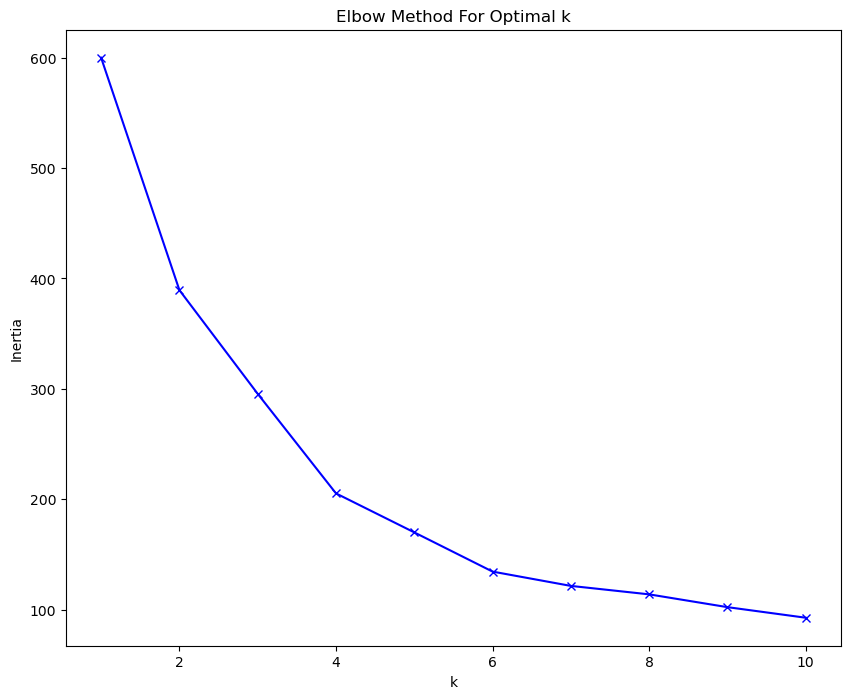

In [102]:
#엘보우 그래프로 k값 찾기
plt.figure(figsize=(10, 8))
plt.plot(K, find, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [103]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(data_scale)

d:\Program\Anaconda\envs\machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [104]:
predict = model.predict(data_scale) 

In [105]:
predict

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [106]:
data['Cluster'] = model.labels_

In [107]:
data

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,2
3,23,16,77,2
4,31,17,40,2
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


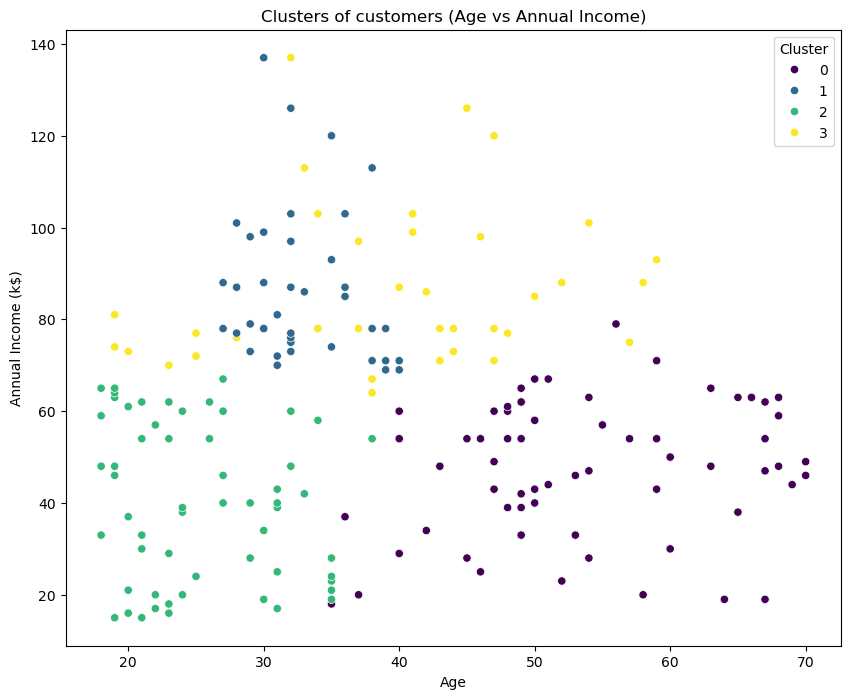

In [108]:
# 2차원으로 군집 시각화 (연령 vs 소득)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of customers (Age vs Annual Income)')
plt.show()


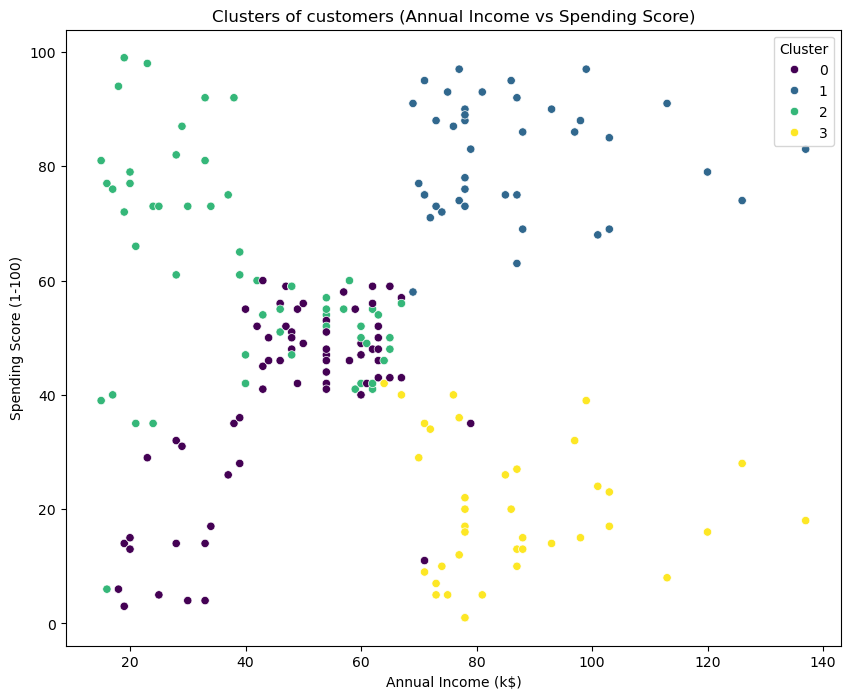

In [109]:
# 2차원으로 군집 시각화 (소득 vs 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of customers (Annual Income vs Spending Score)')
plt.show()